In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [9]:
ds = pd.read_csv('./movies_prerelease.csv')

In [10]:
ds['Target'] = ds['Target'].map({1:1, 2:1, 3:1, 4:2, 5:3, 6:3}).astype(int)
data = ds.drop(columns=['Movie', 'Rating', 'Votes', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]'])

In [11]:
## yearwise split
X_full = data.drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_full = data.Target.values

X_train = data[data.Year != 2018].drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_train = data[data.Year != 2018].Target.values

X_test = data[data.Year == 2018].drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_test = data[data.Year == 2018].Target.values

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(929, 1796) (929,)
(57, 1796) (57,)


In [12]:
loaded_model = pickle.load(open('year_svm.pkl', 'rb'))
type(loaded_model)
result_svm = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_naivebayes.pkl', 'rb'))
type(loaded_model)
result_naivebayes = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_knn.pkl', 'rb'))
type(loaded_model)
result_knn = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_logreg.pkl', 'rb'))
type(loaded_model)
result_logreg = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_randfor.pkl', 'rb'))
type(loaded_model)
result_randfor = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_randfor2.pkl', 'rb'))
type(loaded_model)
result_randfor2 = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_dt.pkl', 'rb'))
type(loaded_model)
result_dt = loaded_model.predict(X_full)

In [14]:
data3 = pd.DataFrame({'BoxOffice': ds.BoxOffice,
                   'Budget': ds.Budget,
                   'Year': ds.Year,
                   'M1': result_svm,
                   'M2': result_naivebayes,
                   'M3': result_knn,
                   'M4': result_logreg,
                   'M5': result_dt,
                   })

In [15]:
## yearwise split
X_train3 = data3[data3.Year != 2018].drop(columns=['BoxOffice', 'Year']).values
Y_train3 = data3[data3.Year != 2018].BoxOffice.values + 26

X_test3 = data3[data3.Year == 2018].drop(columns=['BoxOffice', 'Year']).values
Y_test3 = data3[data3.Year == 2018].BoxOffice.values + 26

print (X_train3.shape, Y_train3.shape)
print (X_test3.shape, Y_test3.shape)

(929, 6) (929,)
(57, 6) (57,)


In [16]:
lm2 = LinearRegression()
lm2.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print(lm2.score(X_test3, Y_test3))
print(lm2.coef_)

0.6726736637389532
[ 1.37861687  7.28425306 -1.07900928  0.36731349  0.95737867 13.13869626]


In [23]:
y_pred3 = lm2.predict(X_test3)
print(y_pred3.shape)
for i in range(y_pred3.shape[0]):
    print(y_pred3[i], Y_test3[i], X_test3[i], np.round(np.average(X_test3[i])))

(57,)
118.70033191213986 63.0 [50.  3.  3.  1.  3.  3.] 10.0
58.05529296171118 52.0 [30.  2.  2.  2.  2.  1.] 6.0
112.86240161909245 105.0 [50.  2.  2.  2.  3.  3.] 10.0
71.0962138270298 153.0 [25.  3.  3.  1.  3.  2.] 6.0
20.195785813975043 29.5 [8. 1. 1. 1. 1. 1.] 2.0
36.394805987564 32.5 [20.  1.  2.  3.  1.  1.] 5.0
104.91416318379635 107.0 [40.  3.  3.  1.  3.  3.] 9.0
62.191143580214224 76.0 [33.  2.  2.  2.  2.  1.] 7.0
17.738159660576137 30.0 [7. 1. 2. 1. 1. 1.] 2.0
188.36580253399873 368.0 [100.   3.   3.   3.   3.   3.] 19.0
78.36723256415578 92.0 [45.  2.  2.  1.  2.  1.] 9.0
74.74418125353642 149.8 [37.  3.  1.  1.  1.  1.] 7.0
146.68415581431208 201.0 [100.   1.   2.   3.   1.   1.] 18.0
20.795000998514638 27.75 [10.  1.  3.  1.  1.  1.] 3.0
152.46467882538835 131.0 [90.  2.  3.  1.  2.  2.] 17.0
325.15910141975286 328.0 [215.   2.   3.   2.   2.   2.] 38.0
62.153507183545166 100.0 [40.  1.  3.  1.  1.  1.] 8.0
32.603337669484205 28.0 [17.  1.  1.  1.  1.  1.] 4.0
42.55326

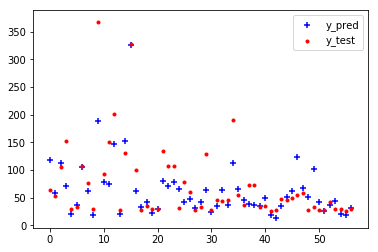

In [24]:
pickle.dump(lm2, open('year_lm2.pkl', 'wb'))

y = range(y_pred3.shape[0])
plt.scatter(y, y_pred3, c='b', marker='+')
plt.scatter(y, Y_test3, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [21]:
loaded_model = pickle.load(open('year_lm2.pkl', 'rb'))
type(loaded_model)
a=np.zeros((6,))
a[0]=50
a[1]=3
a[2]=3
a[3]=1
a[4]=3
a[5]=3
b = np.reshape(a, (-1, 6))
print(loaded_model.predict(b))

[118.70033191]
